## <strong><center>Importing the <span style= "color: #FDCA40">packeges

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import sqlite3

In [197]:
%matplotlib inline
plt.rcParams['font.family'] = 'Nirmala UI' # 

warnings.filterwarnings('ignore')

COLORS          : list = ['#080708', '#3772FF', '#DF2935', '#FDCA40', '#E6E8E6']
FONT            : int  = 17
PAD             : int  = 10

## <center><strong>Data reading & basic <span style= 'color: #FDCA40'> Exploring

In [3]:
conn = sqlite3.connect("../database.db")
df = pd.read_sql_query("SELECT * from `movies_data`", conn)

conn.close()

In [5]:
cm = sns.light_palette(COLORS[1], as_cmap=True)
display(df.drop(['overview', 'genres', 'production_companies', 'tagline'], axis= 1)
        .sample(5).style.background_gradient(cmap= cm))

,Unnamed: 0,movie_id,movie_title,popularity,rating,runtime,revenue,release_date,vote_count,budget
218,218,597,Titanic,110.392000,7.900000,194,2264162353,1997-11-18,23471,200000000
36,36,1003581,Justice League: Warworld,541.985000,7.281000,90,0,2023-07-25,155,0
169,169,1094319,The Best Man,124.516000,6.145000,93,0,2023-04-21,86,0
61,61,980489,Gran Turismo,394.311000,7.345000,135,0,2023-08-09,152,100000000
53,53,575264,Mission: Impossible - Dead Reckoning Part One,344.491000,7.745000,164,541559000,2023-07-08,1058,291000000


In [29]:
display(df.drop(['overview', 'genres', 'production_companies', 'tagline'], axis= 1)
        .sample(5).style.applymap(lambda val: f'background-color: {COLORS[2]}' if val == 0 else ''))

,Unnamed: 0,movie_id,movie_title,popularity,rating,runtime,revenue,release_date,vote_count,budget
399,399,842945,Supercell,78.897000,6.024000,100,0,2023-03-17,188,0
267,267,760741,Beast,95.296000,6.741000,93,56000000,2022-08-11,1191,0
320,320,438631,Dune,90.633000,7.800000,155,402027830,2021-09-15,9294,165000000
125,125,1073170,Zoey 102,171.411000,7.110000,101,0,2023-07-27,109,0
200,200,198663,The Maze Runner,138.682000,7.174000,113,348319861,2014-09-10,15817,34000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            400 non-null    int64  
 1   movie_id              400 non-null    int64  
 2   movie_title           400 non-null    object 
 3   overview              393 non-null    object 
 4   popularity            400 non-null    float64
 5   rating                400 non-null    float64
 6   tagline               309 non-null    object 
 7   runtime               400 non-null    int64  
 8   revenue               400 non-null    int64  
 9   release_date          400 non-null    object 
 10  vote_count            400 non-null    int64  
 11  budget                400 non-null    int64  
 12  genres                400 non-null    object 
 13  production_companies  400 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 43.9+ KB


In [35]:
cm = sns.light_palette(COLORS[3], as_cmap=True)
df.describe().style.background_gradient(cmap=cm)

,Unnamed: 0,movie_id,popularity,rating,runtime,revenue,vote_count,budget
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,583808.637500,235.648107,6.856740,108.055000,243423319.220000,4665.300000,57214581.310000
std,115.614301,376856.398110,315.528209,1.310560,32.649072,422907652.393429,7057.258698,83626377.531629
min,0.000000,11.000000,54.008000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,269760.500000,98.705750,6.452500,92.000000,0.000000,87.500000,0.000000
50%,199.500000,634011.500000,129.583500,7.057500,105.000000,14774193.500000,933.500000,12000000.000000
75%,299.250000,913737.000000,222.333250,7.643750,124.000000,357119472.500000,6964.750000,90500000.000000
max,399.000000,1163045.000000,2933.943000,10.000000,242.000000,2923706026.000000,34312.000000,460000000.000000


## <center><strong>Visualizing data <span style= 'color: #FDCA40'> Issues

In [145]:
def add_bar_labels(x,y, ax, scaler= 0):
    for i in range(len(x)):
        ax.text(i, y[i] + scaler , '{:,}'.format(y[i]), ha = 'center')
        
        
def format_large_numbers(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.0f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.0f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}K'
    else:
        return str(int(x))

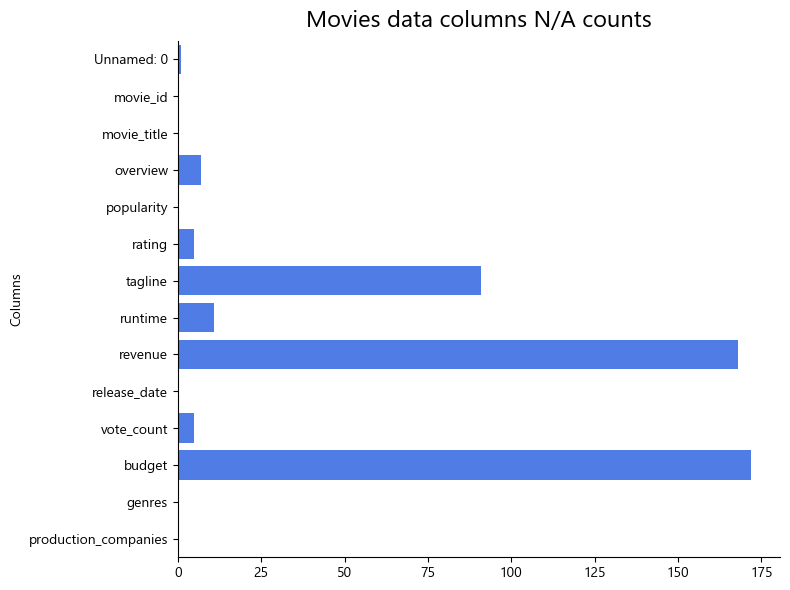

In [222]:
fig, ax = plt.subplots()

null_count = []

for col in df.columns:
    null_count.append(df[col].isnull().sum() + (df[col] == 0).sum())


sns.barplot(x= null_count, y= df.columns,
            color= COLORS[1])

plt.sca(ax)
plt.ylabel('Columns')
sns.despine()

ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))


ax.set_title('Movies data columns N/A counts', fontsize=FONT, pad= PAD)

fig.set_size_inches(8, 6)
plt.tight_layout()
plt.show()

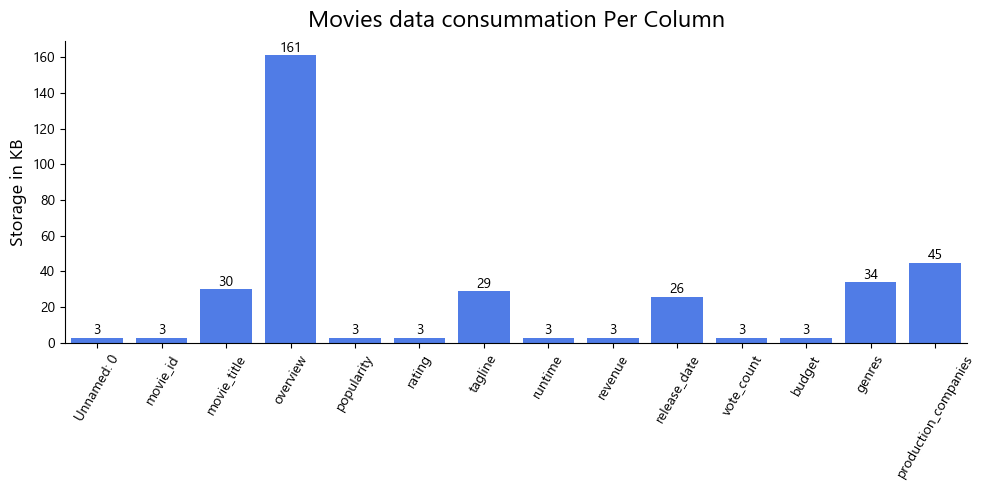

In [202]:
fig, ax = plt.subplots()


data_consumation  = df.memory_usage(index=False, deep=True).values // 1024
cols              = df.memory_usage(index=False, deep=True).index

sns.barplot(x= cols, y= data_consumation, color= COLORS[1],  ax= ax)
add_bar_labels(cols, data_consumation, ax, scaler= 2)


plt.sca(ax)
sns.despine()

ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.spines['right'] .set_visible(False)
ax.spines['top']   .set_visible(False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(cols, rotation=60)

ax.set_ylabel('Storage in KB', fontsize= FONT / 1.3)
ax.set_title('Movies data consummation Per Column', fontsize= FONT, pad= PAD)

fig.set_size_inches(10, 5)

plt.tight_layout()
plt.show()

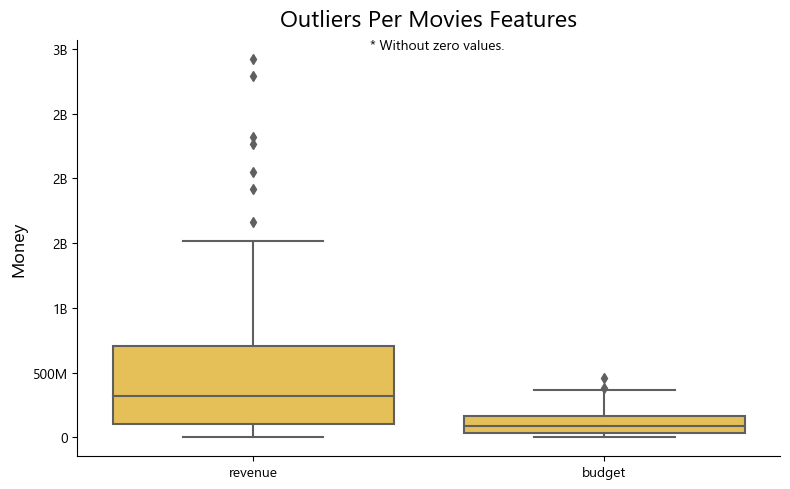

In [220]:
fig, ax = plt.subplots()

mask = (df == 0).any(axis=1)
chart_data = df[~mask][['revenue', 'budget']]

sns.boxplot(data= chart_data, palette= [COLORS[3]], ax=ax)

ax.set_ylabel('Money', fontsize= FONT / 1.3)
ax.set_title('Outliers Per Movies Features', fontsize= FONT, pad= PAD)

ax.spines['right']   .set_visible(False)
ax.spines['top']     .set_visible(False)

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_large_numbers))
plt.text(s= '* Without zero values.', y= 3_000_000_000, x= 1/3)

fig.set_size_inches(8, 5)

plt.tight_layout()
plt.show()

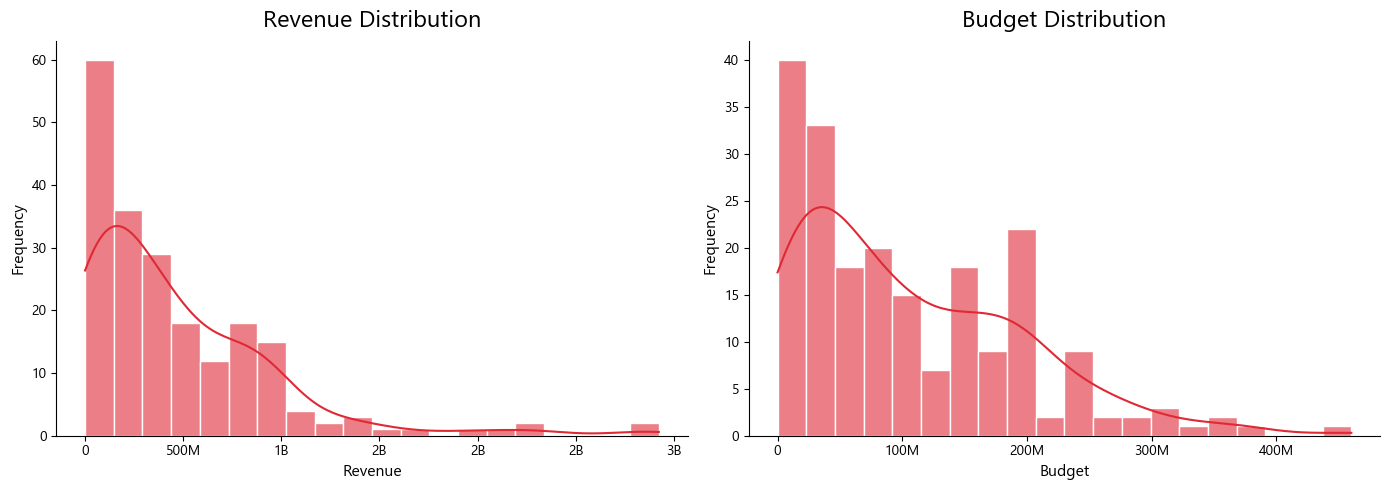

In [221]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns .histplot(chart_data['revenue'] , bins= 20, kde= True, ax= ax1, edgecolor= 'white',
              color= COLORS[2], alpha= 0.6)

sns .histplot(chart_data['budget']  , bins= 20, kde= True, ax= ax2, edgecolor= 'white',
             color= COLORS[2], alpha= 0.6)


ax1.set_title('Revenue Distribution', fontsize= FONT, pad= PAD)
ax1.set_xlabel('Revenue',   fontsize= FONT / 1.5)

ax2.set_title('Budget Distribution', fontsize= FONT, pad= PAD)
ax2.set_xlabel('Budget',     fontsize= FONT / 1.5)


for ax in (ax1, ax2):
    ax.set_ylabel('Frequency',  fontsize= FONT / 1.5)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_large_numbers))
    ax.spines['right'] .set_visible(False)
    ax.spines['top']   .set_visible(False)


plt.tight_layout()
plt.show()

## <center><strong> Data Issues we can <span style= "color: #FDCA40">Conclude

#### Our Data Issues & Findings:
- Useless Unamed column.
- There are many zeros that indicates NANs in every column of the data. <sub>*(Except `overview` & `tagline` they have real NANs)</sub>
- The most of the zero values are in the Revenue & Budget columns whitch should be fixed.
- There are some columns that need DType optimization to be more memory effecient.
- The Revenues & Budget outliers are kinda rare but still they need to be fixed.
- The Histogram is right tail skewed histogram.

#### **Important note:**

The zero values have been removed from the data in the Histogram and the Box-plot 